# Penguins, Pessimists, and Paradoxes

This is one of the Jupyter notebooks I used in my preparation of *[Probably Overthinking It: How to Use Data to Answer Questions, Avoid Statistical Traps, and Make Better Decisions](https://greenteapress.com/wp/probably-overthinking-it)*, University of Chicago Press, 2023.

Before you read these notebooks, please keep in mind:

* There is some explanatory text here, but some of the examples will not make sense until you have read the corresponding chapter in the book.

* While preparing these notebooks, I made some changes to improve the readability of the code. There might be small differences between what appears in the book and what you get when you run the code.

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ProbablyOverthinkingIt/blob/book/notebooks/simpson.ipynb).

In [1]:
# Install empiricaldist if we don't already have it

try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [2]:
# download utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/notebooks/utils.py")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate

# Set the random seed so we get the same results every time
np.random.seed(17)

In 2021, the journalist I mentioned in the previous chapter wrote a series of misleading articles about the COVID pandemic.
I won't name him, but on April 1, appropriately, *The Atlantic* magazine identified him as "The Pandemic's Wrongest Man".

In November, this journalist posted an online newsletter with the title "Vaccinated English adults under 60 are dying at twice the rate of unvaccinated people the same age".
It includes a graph showing that the overall death rate among young, vaccinated people increased between April and September, 2021, and was actually higher among the vaccinated than among the unvaccinated.

As you might expect, this newsletter got a lot of attention. Among skeptics, it seemed like proof that vaccines were not just ineffective, but harmful. And among people who were counting on vaccines to end the pandemic, it seemed like a devastating setback.

Many people fact-checked the article, and at first the results held up to scrutiny: the graph accurately represented data published by the U.K. Office for National Statistics.
Specifically, it showed death rates, from any cause, for people in England between 10 and 59 years old, from March to September 2021.
And between April and September, these rates were higher among the fully vaccinated, compared to the unvaccinated, by a factor of almost 2.
So the journalist's description of the results was correct.

However, his conclusion that vaccines were causing increased mortality was completely wrong.
In fact, the data he reported shows that vaccines were safe and effective in this population, and demonstrably saved many lives.

How, you might ask, can increased mortality be evidence of saved lives?
The answer is Simpson's paradox.
If you have not seen it before, Simpson's paradox can seem impossible, but as I will try to show you, it is not just possible but ordinary -- and once you've seen enough examples, it is not even surprising.

We'll start with an easy case and work our way up.

## Old Optimists, Young Pessimists

Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves? Almost every year since 1972, the General Social Survey (GSS) has posed that question to a representative sample of adult residents of the United States.

The following figure shows how the responses have changed over time.
The circles show the percentage of people in each survey who said that people try to be helpful.

In [4]:
# https://gssdataexplorer.norc.org/variables/439/vshow

# 1 = helpful
# 2 = look out for themselves
# 3 = depends

In [5]:
# This dataset is prepared in clean_simpson.ipynb

DATA_PATH = "https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/"

filename = "gss_simpson.hdf"
download(DATA_PATH + filename)

In [6]:
gss = pd.read_hdf(filename, "gss")
gss.shape

(68846, 214)

In [7]:
year = gss["year"] == 1978
series = gss.loc[year, "helpful"]
series.describe()

count    1520.000000
mean        1.474342
std         0.605548
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: helpful, dtype: float64

In [8]:
series.value_counts()

1.0    888
2.0    543
3.0     89
Name: helpful, dtype: int64

In [9]:
from empiricaldist import Pmf

Pmf.from_seq(series)

,probs
1.0,0.584211
2.0,0.357237
3.0,0.058553


In [10]:
year = gss["year"] == 1987
series = gss.loc[year, "helpful"]
series.describe()

count    1809.000000
mean        1.606965
std         0.571034
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: helpful, dtype: float64

In [11]:
series.value_counts()

2.0    940
1.0    790
3.0     79
Name: helpful, dtype: int64

In [12]:
from empiricaldist import Pmf

Pmf.from_seq(series)

,probs
1.0,0.436705
2.0,0.519624
3.0,0.043671


In [13]:
xtab = pd.crosstab(gss["year"], gss["helpful"], normalize="index")
series = xtab[1] * 100
series.name = "helpful"
series.max(), series.idxmax(), series.min(), series.idxmin()

(58.42105263157895, 1978, 40.243902439024396, 1996)

In [14]:
title = """Would you say that most of the time people try to be helpful, 
or that they are mostly just looking out for themselves?
"""

short_title = "Would people be helpful or look out for themselves?"

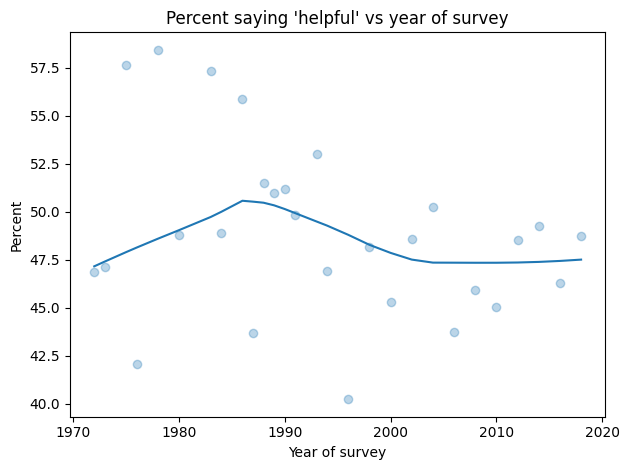

In [15]:
from utils import plot_series_lowess

plot_series_lowess(series, plot_series=True, color="C0", label="")

# plt.title(title, loc="left", fontdict=dict(fontsize=12))
decorate(
    xlabel="Year of survey",
    ylabel="Percent",
    title="Percent saying 'helpful' vs year of survey",
)

In [16]:
from utils import make_lowess

make_lowess(series)

1972.0    46.399992
1973.0    46.804000
1975.0    47.621057
1976.0    48.027929
1978.0    48.815860
1980.0    49.546170
1983.0    50.731526
1984.0    51.032275
1986.0    51.262427
1987.0    51.154733
1988.0    51.145142
1989.0    50.812748
1990.0    50.518220
1991.0    50.078283
1993.0    49.243129
1994.0    48.868180
1996.0    48.351256
1998.0    48.030031
2000.0    47.515587
2002.0    47.034961
2004.0    46.911821
2006.0    46.962785
2008.0    47.104853
2010.0    47.228283
2012.0    47.357632
2014.0    47.510421
2016.0    47.688959
2018.0    47.887754
dtype: float64

The percentages vary from year to year, in part because the GSS surveys a different group of people for each survey.
Looking at the extremes: in 1978, about 58% said "helpful"; in 1996, it was only 40%.

The solid line in the figure shows a LOWESS curve, which is a statistical way to smooth out short-term variation and show the long-term trend.
Putting aside the extreme highs and lows, it looks like the fraction of optimists has decreased since 1990, from about 51% to 48%.

These results don't just depend on when you ask; they also depend on who you ask.
In particular, they depend strongly on when the respondents were born, as shown in the following figure.

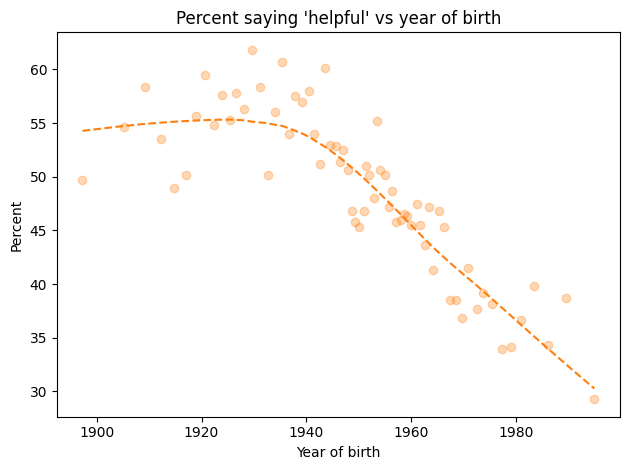

In [17]:
from utils import prepare_yvar
from utils import chunk_series

xvarname = "cohort"
yvarname = "helpful"
yvalue = 1

prepare_yvar(gss, yvarname, yvalue)
series = chunk_series(gss, xvarname, size=600) * 100
plot_series_lowess(
    series,
    plot_series=True,
    color="C1",
    ls="dashed",
    label="",
)

# plt.title(title, loc="left", fontdict=dict(fontsize=11))
decorate(
    xlabel="Year of birth",
    ylabel="Percent",
    title="Percent saying 'helpful' vs year of birth",
)

Notice that the x-axis here is the respondent's year of birth, not the year they participated in the survey.
The oldest person to participate in the GSS was born in 1883.
Because the GSS only surveys adults, the youngest, as of 2021, was born in 2003.
Again, the markers show variability in the survey results; the dashed line shows the long-term trend.

Starting with people born in the 1940s, Americans' faith in humanity has been declining consistently, from about 55% for people born before 1930 to about 30% for people born after 1990.
That is a substantial decrease!

In [18]:
make_lowess(series)

1897.305000    52.120319
1905.215000    53.284864
1909.190000    53.858843
1912.293333    54.306193
1914.818333    54.665509
                 ...    
1980.853333    36.307102
1983.280000    35.352350
1986.106667    34.266167
1989.426667    33.030785
1994.888325    31.071020
Length: 68, dtype: float64

To get an idea of what's happening, let's zoom in on people born in the 1940s.
The following figure shows the fraction of people in this cohort who said people would try to be helpful, plotted over time.

In [19]:
subset = gss.dropna(subset=["cohort10"]).copy()
subset["cohort10"] = subset["cohort10"].astype(int)

In [20]:
from utils import make_table

xvarname = "year"
yvarname = "helpful"
gvarname = "cohort10"
yvalue = 1

prepare_yvar(gss, yvarname, yvalue)
overall = chunk_series(subset, xvarname) * 100
table = make_table(subset, xvarname, yvarname, gvarname, yvalue)
del table[1900]
del table[1910]
series = table[1940]

In [21]:
make_lowess(series)

1972.000000    45.969222
1972.853333    46.838756
1974.640000    48.553441
1975.906667    49.690533
1977.753333    51.209736
1979.553333    52.588674
1982.690000    52.934442
1983.920000    52.947150
1986.003333    52.592398
1987.000000    52.654427
1988.333333    53.031651
1989.936667    53.287806
1992.193333    53.422913
1993.943333    53.406083
1995.486667    53.295321
1997.220000    52.995021
1999.373333    53.017955
2001.793333    53.620756
2005.806667    55.357242
2009.146667    56.867664
2013.180000    58.812900
2016.970370    60.725940
dtype: float64

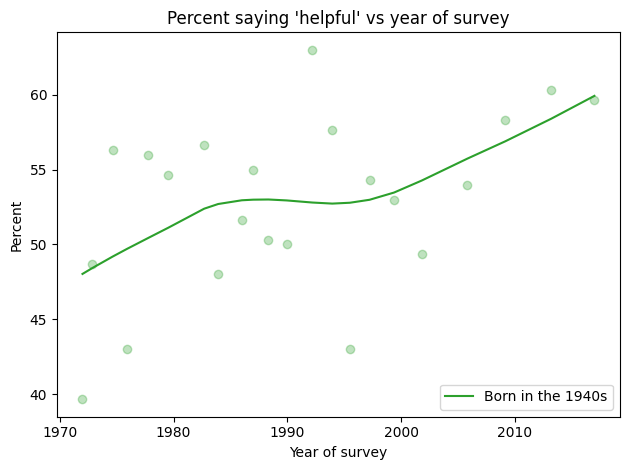

In [22]:
plot_series_lowess(series, plot_series=True, color="C2", label="Born in the 1940s")

decorate(
    xlabel="Year of survey",
    ylabel="Percent",
    title="Percent saying 'helpful' vs year of survey",
    loc="lower right",
)

Again, different people were surveyed each year, so there is a lot of variability. Nevertheless, there is a clear increasing trend.
When this cohort was interviewed in the 1970s, about 46% of them gave a positive response; when they were interviewed in the 2010s, about 61% did.

The following figure shows the responses to this question grouped by decade of birth and plotted over time.
For clarity, I've dropped the circles showing the annual results and plotted only the smoothed lines.

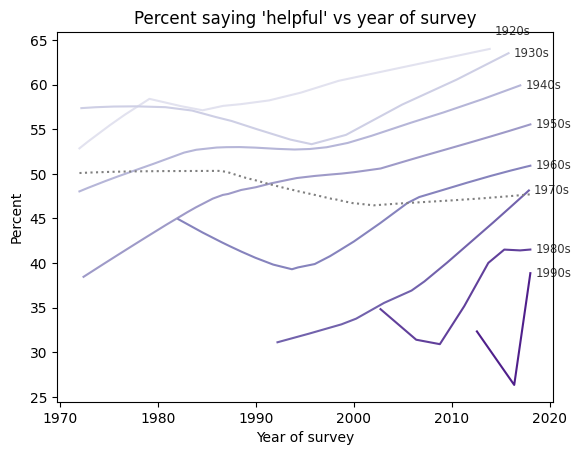

In [23]:
from utils import visualize_table, label_table

visualize_table(
    overall,
    table,
    xlabel="Year of survey",
    ylabel="Percent",
    title="Percent saying 'helpful' vs year of survey",
    plot_series=False,
)
nudge = {"1900s": 1, "1910s": 1, "1920s": 2}
label_table(table, nudge)

The solid lines show the trends within each cohort: people generally become more optimistic as they age.
The dashed line shows the overall trend: on average, people are becoming less optimistic over time.

In this example, the explanation is *generational replacement*; as the oldest, more optimistic cohort dies off, it is replaced by the youngest, more pessimistic cohort.

The differences between these generations are substantial.
In the most recent data, only 39% of respondents born in the 1990s said people would try to be helpful, compared to 51% of those born in the 1960s and 64% of those born in the 1920s.

In [24]:
table[1920].iloc[-1]

64.21052631578948

In [25]:
table[1960].iloc[-1]

50.847457627118644

In [26]:
table[1990].iloc[-1]

38.864628820960704

And the composition of the population has changed a lot over 50 years.
The following figure shows the distribution of birth years for the respondents at the beginning of the survey in 1973, near the middle in 1990, and most recently in 2018.

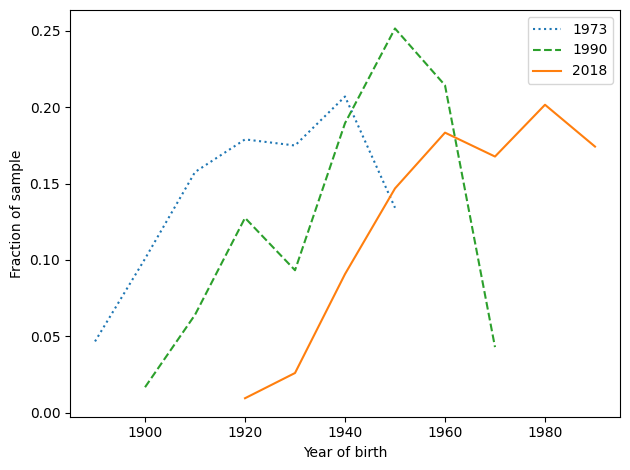

In [27]:
xtab = pd.crosstab(gss["year"], gss["cohort10"], normalize="index").replace(0, np.nan)

Pmf(xtab.loc[1973]).plot(ls=":", label="1973")
Pmf(xtab.loc[1990]).plot(color="C2", ls="--", label="1990")
Pmf(xtab.loc[2018]).plot(color="C1", label="2018")

decorate(xlabel="Year of birth", ylabel="Fraction of sample")

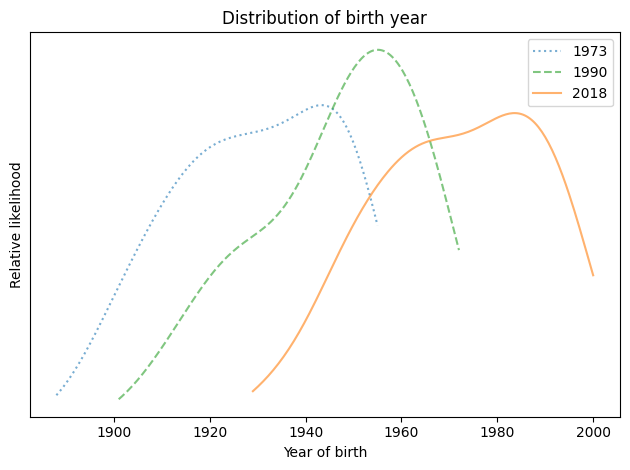

In [28]:
from seaborn import kdeplot

options = dict(bw_adjust=2, cut=0, alpha=0.6)

kdeplot(gss.query("year==1973")["cohort"], ls=":", label="1973", **options)
kdeplot(gss.query("year==1990")["cohort"], color="C2", ls="--", label="1990", **options)
kdeplot(gss.query("year==2018")["cohort"], color="C1", label="2018", **options)

decorate(
    xlabel="Year of birth",
    ylabel="Relative likelihood",
    yticks=[],
    title="Distribution of birth year",
)

In the earliest years of the survey, most the the respondents were born between 1890 and 1950.
In the 1990 survey, most were born between 1901 and 1972.
In the 2018 survey, most were born between 1929 and 2000.

In [29]:
series = gss.query("year==1973")["cohort"]
series.min(), series.max()

(1888.0, 1955.0)

In [30]:
series = gss.query("year==1990")["cohort"]
series.min(), series.max()

(1901.0, 1972.0)

In [31]:
series = gss.query("year==2018")["cohort"]
series.min(), series.max()

(1929.0, 2000.0)

With this explanation, I hope Simpson's paradox no longer seems impossible.
But if it is still surprising, let's look at another example.

## Real Wages

In April 2013 Floyd Norris, chief financial correspondent of *The New York Times*, wrote an article with the headline "Median Pay in U.S. Is Stagnant, but Low-Paid Workers Lose".
Using data from the U.S. Bureau of Labor Statistics, he computed the following changes in median real wages between 2000 and 2013, grouped by level of education:

*    High School Dropouts: -7.9%
*    High School Graduates, No College: -4.7%
*    Some College: -7.6%
*    Bachelor's or Higher: -1.2%

In all groups, real wages were lower in 2013 than in 2000, which is what the article was about.
But Norris also reported the overall change in the median real wage: during the same period, it *increased* by 0.9%.
Several readers wrote to say he had made a mistake.
If wages in all groups were doing down, how could overall wages go up?

To explain what's going on, I will replicate the results from Norris's article using data from the Current Population Survey (CPS) conducted by the U.S. Census Bureau and the Bureau of Labor Statistics.
This dataset includes real wages and education levels for almost 1.9 million participants between 1996 and 2021.
Real wages are adjusted for inflation and reported in constant 1999 dollars.

In [32]:
# this dataset is prepared in clean_cps.ipynb

filename = "ipums_cps.hdf"
download(DATA_PATH + filename)

In [33]:
ipums_cps = pd.read_hdf(filename, "ipums_cps")
ipums_cps.head()

,year,degree,real_wage
4,1970,hs,19068.0
7,1970,nohs,0.0
10,1970,hs,0.0
13,1970,nohs,0.0
17,1970,nohs,908.0


In [34]:
d = {
    "nohs": "No diploma",
    "hs": "High school",
    "bach": "Bachelor",
    "assc": "Associate",
    "college": "Some college",
    "adv": "Advanced",
}
ipums_cps["degree"].replace(d, inplace=True)

In [35]:
start = 1996
recent = ipums_cps[ipums_cps["year"] >= start]
recent.head()

,year,degree,real_wage
3990996,1996,No diploma,67766.0
3991000,1996,Some college,3060.4
3991003,1996,No diploma,0.0
3991004,1996,Advanced,17488.0
3991008,1996,Bachelor,14209.0


In [36]:
recent["real_wage"].describe()

count    1.896422e+06
mean     2.043957e+04
std      3.659772e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.022000e+03
75%      2.963200e+04
max      1.303999e+06
Name: real_wage, dtype: float64

In [37]:
recent["degree"].describe()

count         1896422
unique              6
top       High school
freq           582123
Name: degree, dtype: object

In [38]:
recent["year"].describe()

count    1.896422e+06
mean     2.008845e+03
std      7.023367e+00
min      1.996000e+03
25%      2.003000e+03
50%      2.009000e+03
75%      2.015000e+03
max      2.021000e+03
Name: year, dtype: float64

In [39]:
xvarname = "year"
yvarname = "real_wage"
gvarname = "degree"

In [40]:
overall = recent.groupby("year")["real_wage"].mean()
overall.name = "overall"

In [41]:
from scipy.stats import linregress

res = linregress(overall.index, overall)
res.slope

77.26163851752604

In [42]:
table = pd.pivot_table(
    recent, index="year", columns="degree", values="real_wage", aggfunc="mean"
)

In [43]:
for name, column in table.items():
    res = linregress(column.index, column)
    print(name, res.slope)

Advanced -150.74230565418188
Associate -188.32190788749065
Bachelor -53.36321685585188
High school -89.6395950955906
No diploma -26.70858108935015
Some college -148.96847910461423


In [44]:
columns = [
    "Advanced",
    "Bachelor",
    "Associate",
    "Some college",
    "High school",
    "No diploma",
]

The following figure shows average real wages for each level of education over time.

([<matplotlib.axis.YTick at 0x7f5299f1caf0>,
 [Text(0, 10, '10'), Text(0, 30, '30'), Text(0, 50, '50')])

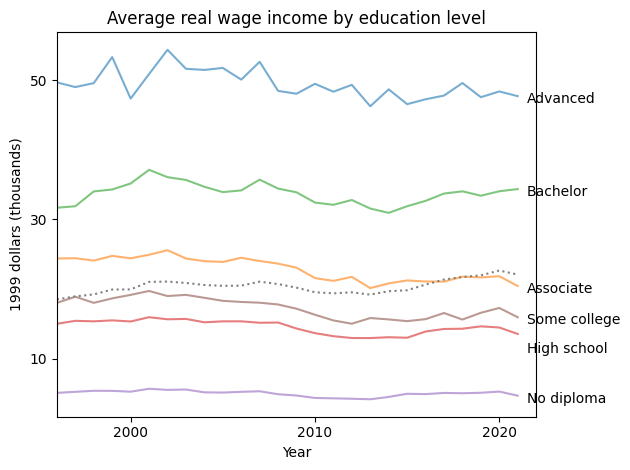

In [45]:
# figwidth = 3.835
# plt.figure(figsize=(figwidth, 0.6 * figwidth))

nudge = {"High school": -1.7}

table2 = table / 1000
for column in table2.columns:
    series = table2[column]
    series.plot(label="", alpha=0.6)
    x = series.index[-1] + 0.5
    y = series.values[-1] + nudge.get(column, 0) - 1
    plt.text(x, y, column)

overall2 = overall / 1000
overall2.plot(ls=":", color="gray", label="")

decorate(
    xlabel="Year",
    ylabel="1999 dollars (thousands)",
    title="Average real wage income by education level",
    xlim=[1996, 2022],
)
plt.xticks([2000, 2010, 2020])
plt.yticks([10, 30, 50])

These results are consistent with Norris's: real wages in every group decreased over this period.
The decrease was steepest among people with an associate degree, by about $190 per year over 26 years.

The decrease was smallest among people with no high school diploma, about $30 per year.

However, if we combine the groups, real wages increased during the same period by about $80 per year, as shown by the dotted line in the figure.
Again, this seems like a contradiction.

In this example, the explanation is that levels of education changed substantially during this period.
The following figure shows the fraction of the population at each educational level, plotted over time.

In [46]:
xtab = pd.crosstab(recent["year"], recent["degree"], normalize="index") * 100
xtab

degree,Advanced,Associate,Bachelor,High school,No diploma,Some college
year,,,,,,
1996,6.407083,6.425194,13.955126,32.711540,22.181306,18.319750
1997,6.413669,6.337339,14.177790,33.135006,21.450660,18.485536
1998,6.561266,6.693503,14.246543,33.138868,21.130622,18.229197
1999,6.731085,6.553290,14.739588,32.882404,20.543048,18.550585
2000,7.237661,6.802157,15.022058,32.606237,19.940802,18.391086
2001,7.242623,7.279962,15.264699,32.047467,19.786234,18.379015
2002,7.554037,7.265446,15.546263,31.826374,19.745568,18.062312
2003,7.619399,7.385120,15.668110,31.453953,19.497431,18.375987
2004,8.010435,7.387682,15.799661,31.305979,19.099773,18.396470


In [47]:
columns2 = [
    "High school",
    "Bachelor",
    "Some college",
    "No diploma",
    "Advanced",
    "Associate",
]

left = [
    "High school",
    "Some college",
    "No diploma",
]

([<matplotlib.axis.XTick at 0x7f5299ef3370>,
 [Text(2000, 0, '2000'), Text(2010, 0, '2010'), Text(2020, 0, '2020')])

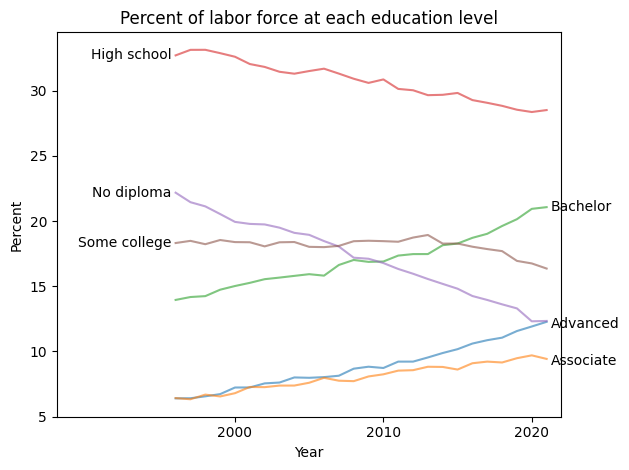

In [48]:
nudge = {"No diploma": 0, "Advanced": -0.2, "Associate": -0.2}

for column in xtab.columns:
    series = xtab[column]
    series.plot(label="", alpha=0.6)
    if column in left:
        x = series.index[0] - 0.3
        y = series.values[0] + nudge.get(column, 0) - 0.3
        plt.text(x, y, column, ha="right")
    else:
        x = series.index[-1] + 0.3
        y = series.values[-1] + nudge.get(column, 0) - 0.3
        plt.text(x, y, column, ha="left")


decorate(
    xlabel="Year",
    ylabel="Percent",
    xlim=[1988, 2022],
    title="Percent of labor force at each education level",
)
plt.xticks([2000, 2010, 2020])

Compared to 1996, people in 2021 have more education.
The groups with associate degrees, bachelor's degrees, or advanced degrees have grown by 3-7 percentage points.
Meanwhile, the groups with no diploma, high school, or some college have shrunk by 2-10 percentage points.

So the overall increase in real wages is driven by changes in education levels, not by higher wages at any level.
For example, a person with a bachelor's degree in 2021 makes less money, on average, than a person with a bachelor's degree in 1996.
But a random person in 2021 is more likely to have a bachelor's degree (or more) than a person in 1996, so they make more money, on average.

In [49]:
xtab.loc[2021] - xtab.loc[1996]

degree
Advanced        5.868831
Associate       3.005632
Bachelor        7.116409
High school    -4.194782
No diploma     -9.837951
Some college   -1.958139
dtype: float64

Simpson's paradox does not require the variable on the $x$ axis to be time.
More generally, it can happen with any variables on the $x$ and $y$ axes and any set of groups.
To demonstrate, let's look at an example that doesn't depend on time.

## Penguins

In 2014 a team of biologists published measurements they collected from three species of penguins living near Palmer Station in Antarctica.
For 344 penguins, the dataset includes body mass, flipper length, and the length and depth of their beaks: more specifically, the part of the beak called the culmen.

This dataset has become popular with machine learning experts because it is a fun way to demonstrate all kinds of statistical methods, especially classification algorithms.

Allison Horst, an environmental scientist who helped make this dataset freely available, used it to demonstrate Simpson's paradox.
The following figure shows the example she discovered:

In [50]:
filename = "penguins_raw.csv"
download(DATA_PATH + filename)

In [51]:
df = pd.read_csv(filename)
df.shape

(344, 17)

In [52]:
def shorten(species):
    """Select the first word from a string."""
    return species.split()[0]


df["Species2"] = df["Species"].apply(shorten)

In [53]:
var1 = "Flipper Length (mm)"
var2 = "Culmen Length (mm)"
var3 = "Culmen Depth (mm)"
var4 = "Body Mass (g)"

In [54]:
from utils import Or70, Pu50, Gr30

colors = [Or70, Pu50, Gr30]
markers = ["s", "o", "^"]

In [55]:
def scatterplot(df, var1, var2):
    """Make a scatter plot."""
    grouped = df.groupby("Species2")
    i = 0
    for species, group in grouped:
        style = "s"
        plt.plot(
            group[var1],
            group[var2],
            markers[i],
            color=colors[i],
            label=species,
            alpha=0.2,
        )
        i += 1

    decorate(xlabel=var1, ylabel=var2)
    plt.legend(loc="upper left", bbox_to_anchor=(0.98, 1.0))
    plt.tight_layout()

In [56]:
def plot_line(group, result, **options):
    """Plot a linear regression line.

    group: DataFrame
    result: linear regression result
    """
    xs = group[var2].min(), group[var2].max()
    ys = np.array(xs) * result.slope + result.intercept
    plt.plot(xs, ys, alpha=0.5, **options)

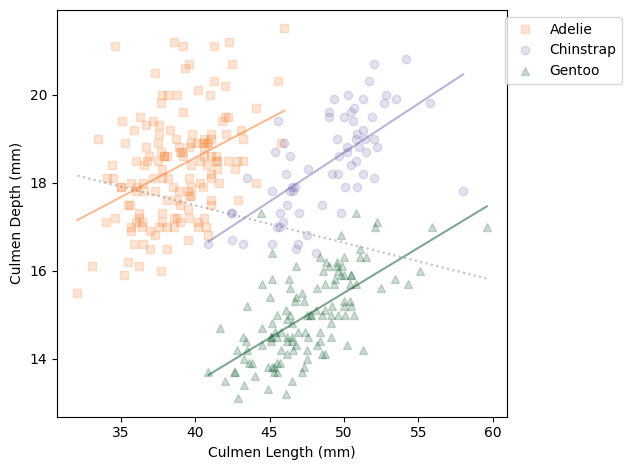

In [57]:
from scipy.stats import linregress

scatterplot(df, var2, var3)

data = df.dropna(subset=[var2, var3])
grouped = data.groupby("Species2")
i = 0
for species, group in grouped:
    result = linregress(group[var2], group[var3])
    plot_line(group, result, color=colors[i])
    i += 1

result = linregress(data[var2], data[var3])
plot_line(data, result, ls=":", color="gray")

Each marker represents the culmen length and depth of an individual penguin. 
The different marker shapes represent different species: Adélie, Chinstrap, and Gentoo.
The solid lines are the lines of best fit within each species; in all three, there is a positive correlation between length and depth.
The dotted line shows the line of best fit among all of the penguins; between species, there is a negative correlation between length and depth.

In this example, the correlation within species has some meaning: most likely, length and depth are correlated because both are correlated with body size.
Bigger penguins have bigger beaks.

However, when we combine samples from different species and find that the correlation of these variables is negative, that's a statistical artifact.
It depends on the species we choose and how many penguins of each species we measure.
So it doesn't really mean anything.

In [58]:
for species, group in grouped:
    result = linregress(group[var2], group[var3])
    print(species, result.slope)

result = linregress(data[var2], data[var3])
print("overall", result.slope)

Adelie 0.178834349642578
Chinstrap 0.2222117240036715
Gentoo 0.20484434062147577
overall -0.08502128077717656


These results are puzzling only if you think the trend within groups is necessarily the same as the the trend between groups.
Once you realize that's not true, the paradox is resolved.

## Simpson's Prescription

Some of the most bewildering examples of Simpson's paradox come up in medicine, where a treatment might prove to be effective for men, effective for women, and ineffective or harmful for people.
To understand examples like that, let's start with an analogous example from the General Social Survey.

Since 1973, the GSS has asked respondents, "Is there any area right around here--that is, within a mile--where you would be afraid to walk alone at night?"
Out of more than 37,000 people who have answered this question, about 38% said "Yes".

Since 1974, they have also asked, "Should divorce in this country be easier or more difficult to obtain than it is now?"
About 49% of the respondents said it should be more difficult.

In [59]:
gss["divlaw"].notna().sum()

37489

In [60]:
(gss["divlaw"].dropna() == 2).mean()

0.48926351729840756

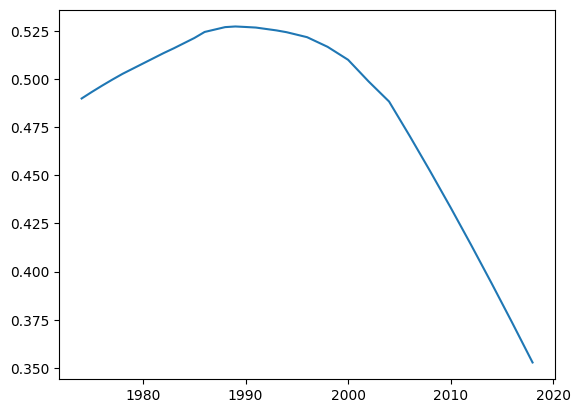

In [61]:
xtab = pd.crosstab(gss["year"], gss["divlaw"], normalize="index")
plot_series_lowess(xtab[2])

In [62]:
gss["fear"].notna().sum()

43573

In [63]:
(gss["fear"].dropna() == 1).mean()

0.38328781584926447

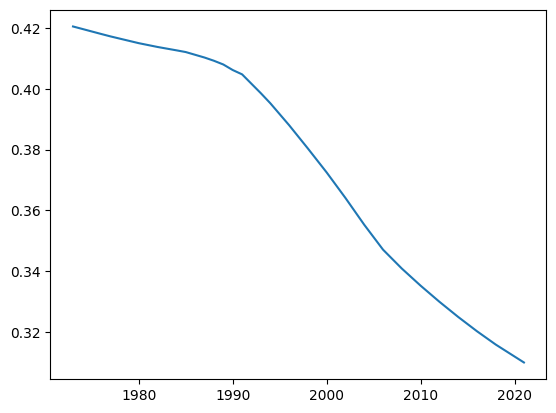

In [64]:
xtab = pd.crosstab(gss["year"], gss["fear"], normalize="index")
plot_series_lowess(xtab[1])

Now, if you had to guess, would you expect these responses to be correlated; that is, do you think someone who says they are afraid to walk alone at night might be more likely to say divorce should be more difficult?
As it turns out, they are slightly correlated:

* Of people who said they are afraid, about 50% said divorce should be more difficult.

* Of people who said they are not afraid, about 49% said divorce should be more difficult.

However, there are several reasons we should not take this correlation too seriously:

* The difference between the groups is too small to make any real difference, even if it were valid;

* It combines results from 1974 to 2018, so it ignores the changes in both responses over that time; and

* It is actually an artifact of Simpson's paradox.

To explain the third point, let's look at responses from men and women separately. The following figure shows this breakdown.

In [65]:
# This example doesn't work with the new 2021 data.
# Examples of Simpson's paradox are not always robust, but the
# point of this example is that it existed at a point in time.

gss = pd.read_hdf("gss_simpson.hdf", "gss")
gss.shape

(68846, 214)

In [66]:
data = gss.dropna(subset=["fear"]).copy()

In [67]:
data["fear"].replace(2, 0, inplace=True)
data["fear"].value_counts()

0.0    26872
1.0    16701
Name: fear, dtype: int64

In [68]:
data["sex"].replace({1: "Male", 2: "Female"}, inplace=True)
data["sex"].value_counts()

Female    23420
Male      20011
Name: sex, dtype: int64

In [69]:
from utils import make_pivot_table

xvarname = "fear"
yvarname = "divlaw"
gvarname = "sex"
yvalue = 2

series, table = make_pivot_table(data, xvarname, yvarname, gvarname, yvalue)
series

fear
0.0    48.567299
1.0    50.683683
Name: all, dtype: float64

In [70]:
table

sex,Female,Male
fear,,
0.0,50.795290,47.008671
1.0,51.736295,47.706879


In [71]:
series

fear
0.0    48.567299
1.0    50.683683
Name: all, dtype: float64

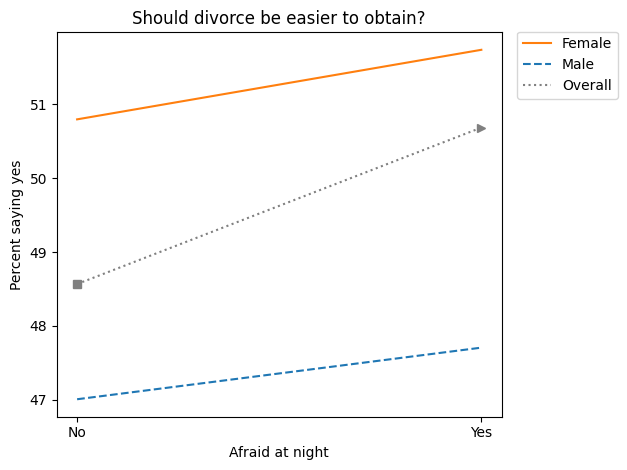

In [72]:
from utils import anchor_legend

table["Female"].plot(color="C1")
table["Male"].plot(ls="--", color="C0")

series.plot(ls=":", color="gray", label="Overall")
plt.plot(0, series[0], "s", color="gray")
plt.plot(1, series[1], ">", color="gray")

title = "Should divorce be easier to obtain?"
decorate(xlabel="Afraid at night", ylabel="Percent saying yes", title=title)
plt.xticks([0, 1], ["No", "Yes"])
anchor_legend(1.02, 1.02)
None

Among women, people who are afraid are less likely to say divorce should be difficult.
And among men, people who are afraid are *also* less likely to say divorce should be difficult (very slightly).
In both groups, the correlation is negative, but when we put them together, the correlation is positive.
People who are afraid are more likely to say divorce should be difficult.

As with the other examples of Simpson's paradox, this might seem to be impossible.
But as with the other examples, it is not.

The key is to realize that there is a correlation between the sex of the respondent and their responses to both questions.
In particular, of the people who said they are not afraid, 41% are female; of the people who said they *are* afraid, 74% are female.
You can actually see these proportions in the figure:

* On the left, the square marker is 41% of the way between the male and female proportions.

* On the right, the triangle marker is 74% of the way between the male and female proportions.

In both cases, the overall proportion is a mixture of the male and female proportions. But it is a *different* mixture on the left and right.
That's why Simpson's paradox is possible.

In [73]:
xtab = pd.crosstab(data["fear"], data["sex"], normalize="index")
xtab

sex,Female,Male
fear,,
0.0,0.420412,0.579588
1.0,0.730517,0.269483


With this example under our belts, we are ready to take on one of the best-known examples of Simpson's paradox.
It comes from a paper, published in 1986 by researchers at St Paul's Hospital in London, that compared two treatments for kidney stones: (A) open surgery and (B) percutaneous nephrolithotomy.
For our purposes, it doesn't matter what these treatments are; I'll just call them A and B.

Among 350 patients who received Treatment A, 78% had a positive outcome;
among another 350 patients who received Treatment B, 83% had a positive outcome.
So it seems like Treatment B is better.

In [74]:
index = [0, 1]
series = pd.Series([78, 83], index=index)
series

0    78
1    83
dtype: int64

In [75]:
columns = ["Small", "Large"]
numer = pd.DataFrame([[81, 192], [234, 55]], index=index, columns=columns)
numer

,Small,Large
0,81,192
1,234,55


In [76]:
denom = pd.DataFrame([[87, 263], [270, 80]], index=index, columns=columns)
denom

,Small,Large
0,87,263
1,270,80


In [77]:
denom.T.sum()

0    350
1    350
dtype: int64

In [78]:
series = numer.T.sum() / denom.T.sum() * 100
series

0    78.000000
1    82.571429
dtype: float64

However, when they split the patients into groups, they found that the results were reversed:

* Among patients with relatively small kidney stones, Treatment A was better, with a success rate of 93% compared to 86%.

* Among patients with larger kidney stones, Treatment A was better again, with a success rate of 73% compared to 69%.

The following figure shows these results in graphical form.

In [79]:
table = numer / denom * 100
table

,Small,Large
0,93.103448,73.003802
1,86.666667,68.750000


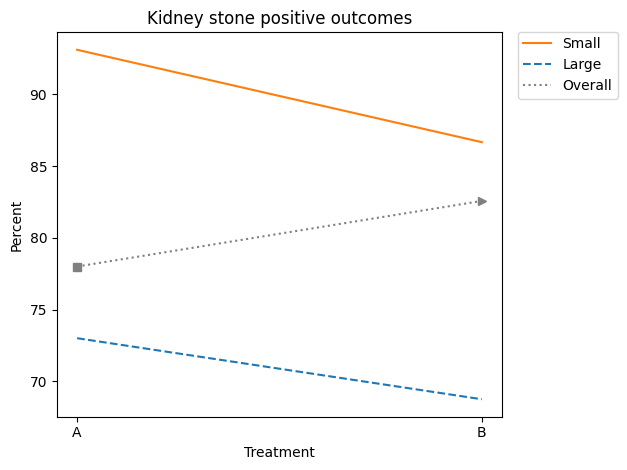

In [80]:
table["Small"].plot(color="C1")
table["Large"].plot(ls="--", color="C0")

series.plot(ls=":", color="gray", label="Overall")
plt.plot(0, series[0], "s", color="gray")
plt.plot(1, series[1], ">", color="gray")

decorate(
    xlabel="Treatment",
    ylabel="Percent",
    title="Kidney stone positive outcomes",
)
plt.xticks([0, 1], ["A", "B"])
anchor_legend(1.02, 1.02)
None

This figure resembles the previous one because the explanation is the same in both cases: the overall percentages, indicated by the square and triangle markers, are mixtures of the percentages from the two groups.
But they are different mixtures on the left and right.

For medical reasons, patients with larger kidney stones were more likely to receive Treatment A; patients with smaller kidney stones were more likely to receive Treatment B.

As a result, among people who received Treatment A, 75% had large kidney stones, which is why the square marker on the left is closer to the Large group.
And among people who received Treatment B, 77% had small kidney stones, which is why the triangle marker is closer to the Small group.

In [81]:
props = denom.T / denom.T.sum()
props

,0,1
Small,0.248571,0.771429
Large,0.751429,0.228571


I hope this explanation makes sense, but even if it does, you might wonder how to choose a treatment.
Suppose you are a patient and your doctor explains:

* For someone with a small kidney stone, Treatment A is better.

* For someone with a large kidney stone, Treatment A is better.

* But overall, Treatment B is better.

Which treatment should you choose?
Other considerations being equal, you should choose A because it has a higher chance of success for any patient, regardless of stone size.
The apparent success of B is a statistical artifact, the result of two causal relationships:

* Smaller stones are more likely to get Treatment B.

* Smaller stones are more likely to lead to a good outcome.

Looking at the overall results, Treatment B only looks good because it is used for easier cases; Treatment A only looks bad because it is used for the hard cases.
If you are choosing a treatment, you should look at the results within the groups, not between the groups.

## Do vaccines work? Hint: yes.

Now that we have mastered Simpson's paradox, let's get back to the example from the beginning of the chapter, the newsletter that went viral with the claim that "Vaccinated English adults under 60 are dying at twice the rate of unvaccinated people the same age".

The newsletter includes a graph based on data from the U.K. Office for National Statistics.
I downloaded the same data and replicated the graph, which looks like this:

In [82]:
# https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2Fbdca5329-b20b-4518-a733-fff84cc22124_1098x681.png

In [83]:
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland
# https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland/deathsoccurringbetween2januaryand24september2021/datasetfinalcorrected3.xlsx

In [84]:
filename = "datasetfinalcorrected3.xlsx"
download(DATA_PATH + filename)

In [85]:
df = pd.read_excel(
    filename,
    sheet_name="Table 4",
    skiprows=3,
    skipfooter=12,
)
df.tail()

,Week ending,Week number,Vaccination status,Age group,Number of deaths,Population,Percentage of total age-group population,"Age-specific rate per 100,000",Unnamed: 8,Lower confidence limit,Upper confidence limit
603,2021-09-17,37,Second dose,80+,4000,2437192,96.3,164.1,NaN,159.1,169.3
604,2021-09-24,38,Second dose,10-59,400,17924346,66.4,2.2,NaN,2,2.5
605,2021-09-24,38,Second dose,60-69,638,4973647,93.8,12.8,NaN,11.9,13.9
606,2021-09-24,38,Second dose,70-79,1553,4171936,96.3,37.2,NaN,35.4,39.1
607,2021-09-24,38,Second dose,80+,3839,2439328,96.3,157.4,NaN,152.4,162.4


In [86]:
df["Age-specific rate per 100,000"].replace(":", np.nan, inplace=True)

In [87]:
df.columns

Index(['Week ending', 'Week number', 'Vaccination status', 'Age group',
       'Number of deaths', 'Population',
       'Percentage of total age-group population',
       'Age-specific rate per 100,000', 'Unnamed: 8', 'Lower confidence limit',
       'Upper confidence limit'],
      dtype='object')

In [88]:
table = df.pivot_table(
    index="Week ending",
    columns=["Vaccination status", "Age group"],
    values="Age-specific rate per 100,000",
    aggfunc="median",
)

In [89]:
table.head()

Vaccination status 21 days or more after first dose                      \
Age group                                     10-59 60-69  70-79    80+   
Week ending                                                               
2021-01-08                                      NaN   NaN    NaN  190.1   
2021-01-15                                      2.7   NaN  104.3  186.8   
2021-01-22                                      2.0   7.5  107.2  175.7   
2021-01-29                                      2.3  14.4   65.0  152.3   
2021-02-05                                      1.5  15.0   59.9  157.5   

Vaccination status Second dose                   Unvaccinated               \
Age group                10-59 60-69 70-79   80+        10-59 60-69  70-79   
Week ending                                                                  
2021-01-08                 NaN   NaN   NaN   8.1          3.7  27.3   69.8   
2021-01-15                 NaN   NaN   NaN  32.8          4.0  30.1   78.8   
2021-01-22                 NaN   NaN   NaN  52.8          4.1  30.8   95.5   
2021-01-29                 NaN   NaN   NaN  53.4          3.7  29.2  112.2   
2021-02-05                 NaN   NaN   NaN  64.7          3.6  26.5  168.2   

Vaccination status         Within 21 days of first dose                     
Age group              80+                        10-59 60-69 70-79    80+  
Week ending                                                                 
2021-01-08           413.4                          0.7  10.8  32.6   84.5  
2021-01-15           645.1                          1.9  19.7  25.8  100.6  
2021-01-22          1198.0                          1.7  21.5  25.4  122.0  
2021-01-29          1571.9                          1.8  18.3  26.3  180.9  
2021-02-05          1456.1                          3.4  11.9  22.8  223.0

In [90]:
recent = table.index >= pd.Timestamp("2021-3-19")

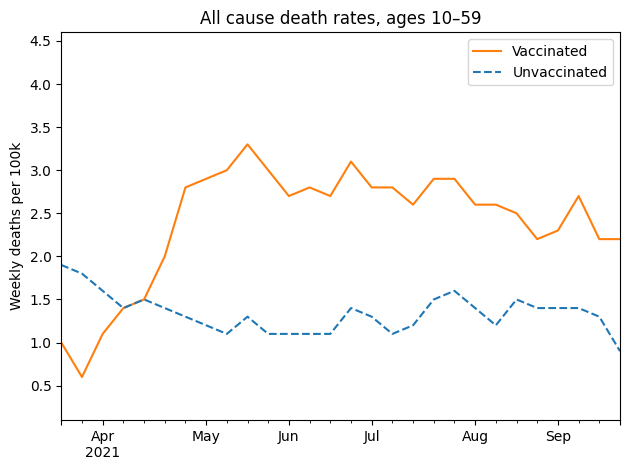

In [91]:
table[recent]["Second dose", "10-59"].plot(color="C1", ls="-", label="Vaccinated")
table[recent]["Unvaccinated", "10-59"].plot(color="C0", ls="--", label="Unvaccinated")

plt.margins(x=0.1, tight=False)
decorate(
    xlabel="",
    ylabel="Weekly deaths per 100k",
    title="All cause death rates, ages 10–59",
    ylim=[0.1, 4.6],
    loc="upper right",
)

The lines show weekly death rates from all causes, per 100,000 people age 10-59, from March to September  2021.
The solid line represents people who were fully vaccinated; the dashed line represents people who were unvaccinated.

The journalist I won't name concludes: "Vaccinated people under 60 are twice as likely to die as unvaccinated people. And overall deaths in Britain are running well above normal. I don't know how to explain this other than vaccine-caused mortality."
Well, I do.

There are two things wrong with his interpretation of the data:

* First, by choosing one age group and time interval, he has cherry-picked data that support his conclusion and ignored data that don't.

* Second, because the data combine a wide range of ages, from 10 to 59, he has been fooled by Simpson's paradox.

Let's debunk one thing at a time.
First, here's what the graph looks like if we include the entire dataset, which starts in January:

In [92]:
start = pd.Timestamp("2021-01-01")
end = pd.Timestamp("2021-09-30")

In [93]:
options = dict(xlabel="", ylabel="Weekly deaths per 100k", xlim=[start, end])

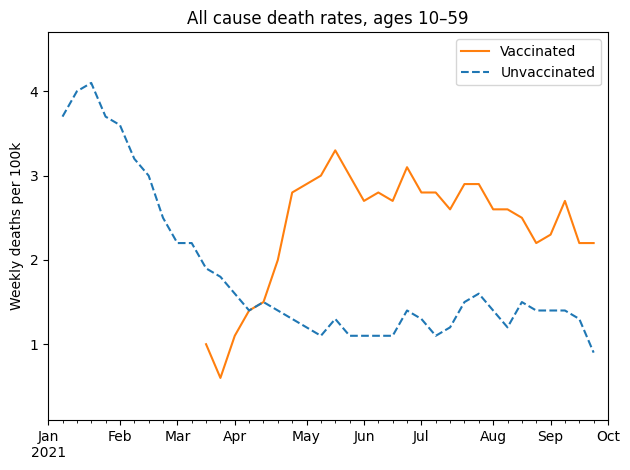

In [94]:
table["Second dose", "10-59"].plot(color="C1", label="Vaccinated")
table["Unvaccinated", "10-59"].plot(ls="--", label="Unvaccinated")

decorate(title="All cause death rates, ages 10–59", ylim=[0.1, 4.7], **options)

Overall death rates were "running well above normal" in January and February, when almost no one in the 10-59 age range had been vaccinated.
Those deaths cannot have been caused by the vaccine; in fact, they were caused by a surge in the Alpha variant of COVID-19.

The unnamed journalist leaves out the time range that contradicts him; he also leaves out the age ranges that contradict him.
In all of the older age ranges, death rates were consistently lower among people who had been vaccinated.
The following figures show death rates for people in their 60s and 70s, and people over 80.

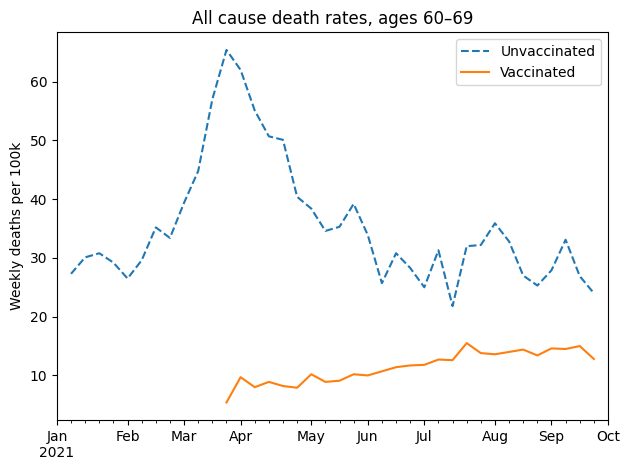

In [95]:
ages = "60-69"
table["Unvaccinated", ages].plot(ls="--", label="Unvaccinated")
table["Second dose", ages].plot(label="Vaccinated")

decorate(title="All cause death rates, ages 60–69", **options)

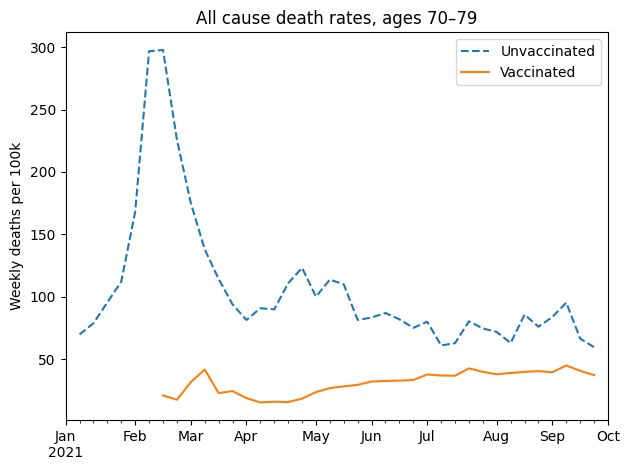

In [96]:
ages = "70-79"
table["Unvaccinated", ages].plot(ls="--", label="Unvaccinated")
table["Second dose", ages].plot(label="Vaccinated")

decorate(title="All cause death rates, ages 70–79", **options)

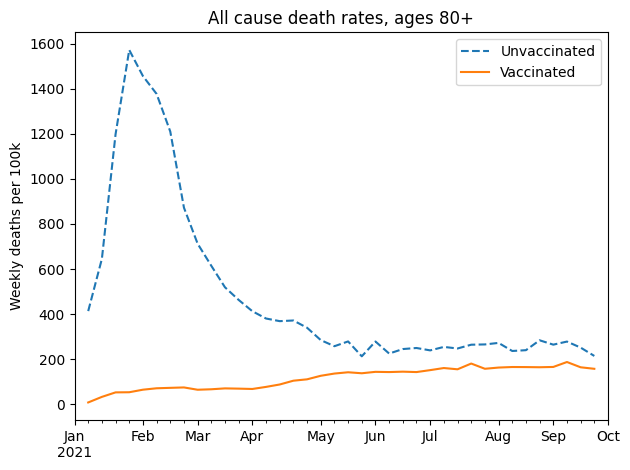

In [97]:
ages = "80+"
table["Unvaccinated", ages].plot(ls="--", label="Unvaccinated")
table["Second dose", ages].plot(label="Vaccinated")

decorate(title="All cause death rates, ages 80+", **options)

Notice that the $y$ axes are on different scales; death rates are much higher in the older age groups.

In [98]:
ages = "80+"
ratio = table["Unvaccinated", ages] / table["Second dose", ages]
ratio.iloc[:10]

Week ending
2021-01-08    51.037037
2021-01-15    19.667683
2021-01-22    22.689394
2021-01-29    29.436330
2021-02-05    22.505410
2021-02-12    19.391549
2021-02-19    16.596708
2021-02-26    11.674699
2021-03-05    11.043411
2021-03-12     9.223724
dtype: float64

In all of these groups, death rates are substantially lower for people who are vaccinated, which is what we expect from a vaccine that has been shown in large clinical trials to be safe and effective.

So what explains the apparent reversal among people between 10 and 59 years old?
It is a statistical artifact caused by Simpson's paradox.
Specifically, it is caused by two correlations:

* Within this age group, older people were more likely to be vaccinated, and

* Older people were more likely to die of any cause, just because they are older.

Both of these correlations are strong.
For example, at the beginning of August, about 88% of people at the high end of this age range had been vaccinated; *none* of the people at the low end had.
And the death rate for people at the high end was 54 times higher than for people at the low end.

To show that these correlations are strong enough to explain the observed difference in death rates, I will follow an analysis by epidemiologist Jeffrey Morris, who refuted the unreliable journalist's claims within days of their publication.
He divides the excessively wide 10-59 year age group into 10 groups, each 5 years wide.

To estimate normal, pre-pandemic death rates in these groups, he uses 2019 data from the U.K. Office of National Statistics.
To estimate the vaccination rate in each group, he uses data from the coronavirus dashboard provided by the U.K. Health Security Agency.
Finally, to estimate the fraction of people in each age group, he uses data from a web site called PopulationPyramid, which organizes and publishes data from the United Nations Department of Economic and Social Affairs.
Not to get lost in the details, these are all reliable data sources.

Combining these datasets, Morris is able to compute the distribution of ages in the vaccinated and unvaccinated groups at the beginning of August 2021 (choosing a point near the middle of the interval in the original graph).
The following figure shows the results.

In [99]:
index = [
    "10-14",
    "15-19",
    "20-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
]

In [100]:
rate = [8.8, 23.1, 39.1, 48.4, 66.9, 97.3, 143.3, 219.6, 321.5, 478.2]
pct_vax = [0, 26.7, 59.6, 59.7, 63.3, 63.3, 74.6, 80.5, 85.6, 88.2]
pct_pop = [5.9, 5.5, 6.2, 6.8, 6.7, 6.6, 6.0, 6.6, 7.0, 6.6]

In [101]:
rate[-1] / rate[0]

54.340909090909086

In [102]:
sheet = pd.DataFrame(dict(rate=rate, pct_vax=pct_vax, pct_pop=pct_pop), index)
sheet

,rate,pct_vax,pct_pop
10-14,8.8,0.0,5.9
15-19,23.1,26.7,5.5
20-24,39.1,59.6,6.2
25-29,48.4,59.7,6.8
30-34,66.9,63.3,6.7
35-39,97.3,63.3,6.6
40-44,143.3,74.6,6.0
45-49,219.6,80.5,6.6
50-54,321.5,85.6,7.0
55-59,478.2,88.2,6.6


In [103]:
sheet["pct_pop"] /= sheet["pct_pop"].sum()
sheet

,rate,pct_vax,pct_pop
10-14,8.8,0.0,0.092332
15-19,23.1,26.7,0.086072
20-24,39.1,59.6,0.097027
25-29,48.4,59.7,0.106416
30-34,66.9,63.3,0.104851
35-39,97.3,63.3,0.103286
40-44,143.3,74.6,0.093897
45-49,219.6,80.5,0.103286
50-54,321.5,85.6,0.109546
55-59,478.2,88.2,0.103286


In [104]:
sheet["pct_vax_age"] = sheet["pct_pop"] * sheet["pct_vax"]
sheet["pct_vax_age"] /= sheet["pct_vax_age"].sum()
sheet

,rate,pct_vax,pct_pop,pct_vax_age
10-14,8.8,0.0,0.092332,0.000000
15-19,23.1,26.7,0.086072,0.037419
20-24,39.1,59.6,0.097027,0.094159
25-29,48.4,59.7,0.106416,0.103444
30-34,66.9,63.3,0.104851,0.108069
35-39,97.3,63.3,0.103286,0.106456
40-44,143.3,74.6,0.093897,0.114054
45-49,219.6,80.5,0.103286,0.135382
50-54,321.5,85.6,0.109546,0.152684
55-59,478.2,88.2,0.103286,0.148332


In [105]:
sheet["pct_novax_age"] = sheet["pct_pop"] * (100 - sheet["pct_vax"])
sheet["pct_novax_age"] /= sheet["pct_novax_age"].sum()
sheet

,rate,pct_vax,pct_pop,pct_vax_age,pct_novax_age
10-14,8.8,0.0,0.092332,0.000000,0.239297
15-19,23.1,26.7,0.086072,0.037419,0.163513
20-24,39.1,59.6,0.097027,0.094159,0.101592
25-29,48.4,59.7,0.106416,0.103444,0.111147
30-34,66.9,63.3,0.104851,0.108069,0.099730
35-39,97.3,63.3,0.103286,0.106456,0.098241
40-44,143.3,74.6,0.093897,0.114054,0.061812
45-49,219.6,80.5,0.103286,0.135382,0.052199
50-54,321.5,85.6,0.109546,0.152684,0.040883
55-59,478.2,88.2,0.103286,0.148332,0.031587


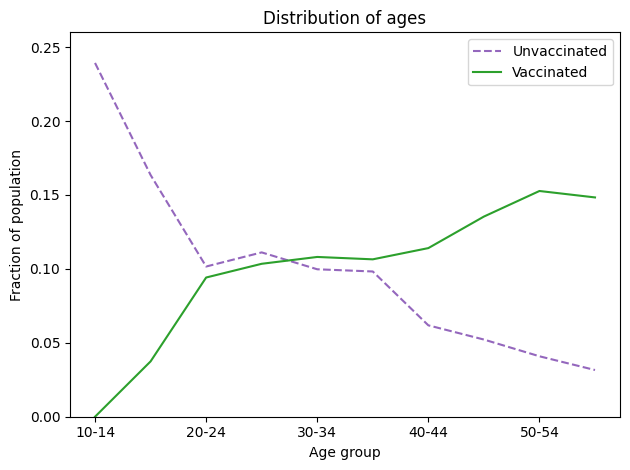

In [106]:
from empiricaldist import Pmf

pmf_novax = Pmf(sheet["pct_novax_age"], copy=True)
pmf_vax = Pmf(sheet["pct_vax_age"], copy=True)

pmf_novax.plot(ls="--", color="C4", label="Unvaccinated")
pmf_vax.plot(color="C2", label="Vaccinated")

decorate(
    xlabel="Age group",
    ylabel="Fraction of population",
    title="Distribution of ages",
    ylim=[0, 0.26],
)

([<matplotlib.axis.YTick at 0x7f52972af5e0>,
 [Text(0, 0.005, '0.005'), Text(0, 0.015, '0.015'), Text(0, 0.025, '0.025')])

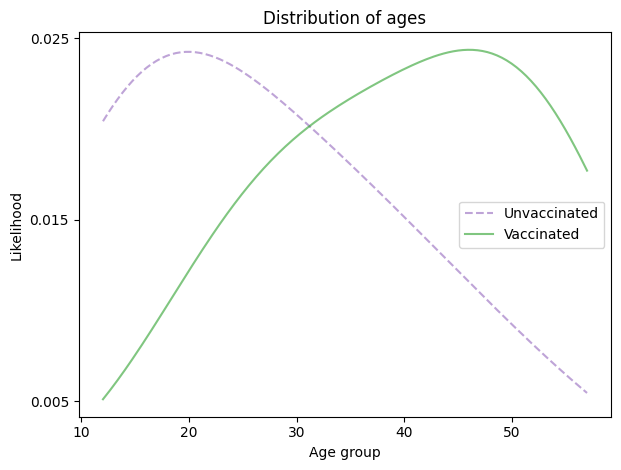

In [107]:
xs = [12, 17, 22, 27, 32, 37, 42, 47, 52, 57]

ps = sheet["pct_novax_age"]
sns.kdeplot(
    x=xs, weights=ps, cut=0, ls="--", color="C4", label="Unvaccinated", alpha=0.6
)

ps = sheet["pct_vax_age"]
sns.kdeplot(x=xs, weights=ps, cut=0, color="C2", label="Vaccinated", alpha=0.6)

decorate(
    xlabel="Age group",
    ylabel="Likelihood",
    title="Distribution of ages",
)
plt.yticks([0.005, 0.015, 0.025])

In [108]:
pmf_vax.index = xs
pmf_novax.index = xs
pmf_vax.mean(), pmf_novax.mean()

(40.445446993711194, 26.68938091143594)

At this point during the rollout of the vaccines, people who were vaccinated were more likely to be at the high end of the age range, and people who were unvaccinated were more likely to be at the low end.
Among the vaccinated, the average age was about 40; among the unvaccinated, it was 27.

Now, for the sake of this example, let's imagine that there are no deaths due to COVID, and no deaths due to the vaccine.
Based only on the distribution of ages and the death rates from 2019, we can compute the expected death rates for the vaccinated and unvaccinated groups.
The ratio of these two rates is about 2.4.

So, prior to the pandemic, we would expect people with the age distribution of the vaccinated to die at a rate 2.4 times higher than people with the age distribution of the unvaccinated, just because they are older.

In reality, the pandemic increased the death rate in both groups, so the actual ratio was smaller, about 1.8.
Thus, the results the journalist presented are not evidence that vaccines are harmful; as Morris concludes, they are "not unexpected, and can be fully explained by the Simpson's paradox artifact".

In [109]:
sheet

,rate,pct_vax,pct_pop,pct_vax_age,pct_novax_age
10-14,8.8,0.0,0.092332,0.000000,0.239297
15-19,23.1,26.7,0.086072,0.037419,0.163513
20-24,39.1,59.6,0.097027,0.094159,0.101592
25-29,48.4,59.7,0.106416,0.103444,0.111147
30-34,66.9,63.3,0.104851,0.108069,0.099730
35-39,97.3,63.3,0.103286,0.106456,0.098241
40-44,143.3,74.6,0.093897,0.114054,0.061812
45-49,219.6,80.5,0.103286,0.135382,0.052199
50-54,321.5,85.6,0.109546,0.152684,0.040883
55-59,478.2,88.2,0.103286,0.148332,0.031587


In [110]:
sheet["death_vax"] = sheet["rate"] * sheet["pct_vax_age"]
sheet["death_novax"] = sheet["rate"] * sheet["pct_novax_age"]
sheet

,rate,pct_vax,pct_pop,pct_vax_age,pct_novax_age,death_vax,death_novax
10-14,8.8,0.0,0.092332,0.000000,0.239297,0.000000,2.105810
15-19,23.1,26.7,0.086072,0.037419,0.163513,0.864387,3.777140
20-24,39.1,59.6,0.097027,0.094159,0.101592,3.681603,3.972229
25-29,48.4,59.7,0.106416,0.103444,0.111147,5.006692,5.379523
30-34,66.9,63.3,0.104851,0.108069,0.099730,7.229811,6.671929
35-39,97.3,63.3,0.103286,0.106456,0.098241,10.358164,9.558886
40-44,143.3,74.6,0.093897,0.114054,0.061812,16.344008,8.857590
45-49,219.6,80.5,0.103286,0.135382,0.052199,29.729969,11.462921
50-54,321.5,85.6,0.109546,0.152684,0.040883,49.087972,13.143951
55-59,478.2,88.2,0.103286,0.148332,0.031587,70.932358,15.104973


In [111]:
sheet["death_vax"].sum(), sheet["death_novax"].sum()

(193.23496549826214, 80.03495027498823)

In [112]:
sheet["death_vax"].sum() / sheet["death_novax"].sum()

2.4143822771718533

## Debunk Redux

So far we have used only data that was publicly available in November 2021, but if we take advantage of more recent data, we can get a clearer picture of what was happening then and what has happened since.

In more recent reports, data from the U.K. Office of National Statistics are broken into smaller age groups.
Instead of one group from ages 10 to 59, we have three groups from 18 to 39, 40 to 49, and 50 to 59.

In [113]:
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland
# https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland/deathsoccurringbetween1january2021and31march2022/referencetable20220516accessiblecorrected.xlsx

In [114]:
filename = "referencetable20220516accessiblecorrected.xlsx"
download(DATA_PATH + filename)

In [115]:
df = pd.read_excel(
    filename,
    sheet_name="Table 2",
    skiprows=3,
)
df.tail()

,Cause of Death,Year,Month,Age group,Vaccination status,Count of deaths,Person-years,"Age-standardised mortality rate / 100,000 person-years",Noted as Unreliable,Lower confidence limit,Upper confidence limit
2200,Non-COVID-19 deaths,2022,March,90+,"First dose, at least 21 days ago",57,191,29817.6,NaN,22582.1,38633
2201,Non-COVID-19 deaths,2022,March,90+,"Second dose, less than 21 days ago",<3,7,x,NaN,x,x
2202,Non-COVID-19 deaths,2022,March,90+,"Second dose, at least 21 days ago",515,1415,36402.2,NaN,33325.7,39686.4
2203,Non-COVID-19 deaths,2022,March,90+,"Third dose or booster, less than 21 days ago",20,67,29992.6,NaN,18312.4,46323.7
2204,Non-COVID-19 deaths,2022,March,90+,"Third dose or booster, at least 21 days ago",7024,36170,19419.5,NaN,18967.9,19879


In [116]:
df.columns

Index(['Cause of Death', 'Year', 'Month', 'Age group', 'Vaccination status',
       'Count of deaths', 'Person-years',
       'Age-standardised mortality rate / 100,000 person-years',
       'Noted as Unreliable', 'Lower confidence limit',
       'Upper confidence limit'],
      dtype='object')

In [117]:
df["date"] = pd.to_datetime(df["Year"].astype(str) + " " + df["Month"])

In [118]:
rate = "Age-standardised mortality rate / 100,000 person-years"
df["rate"] = df[rate].replace("x", np.nan) / 52

In [119]:
count = "Count of deaths"
df[count].replace("<3", np.nan, inplace=True)

In [120]:
all_cause = df["Cause of Death"] == "All causes"
all_cause_df = df[all_cause]
all_cause_df.shape

(735, 13)

In [121]:
table = all_cause_df.pivot_table(
    index="date",
    columns=["Age group", "Vaccination status"],
    values="rate",
    aggfunc="median",
)
table

Age group                                     18-39  \
Vaccination status First dose, at least 21 days ago   
date                                                  
2021-01-01                                 2.305769   
2021-02-01                                 1.313462   
2021-03-01                                 1.767308   
2021-04-01                                 2.194231   
2021-05-01                                 1.573077   
2021-06-01                                 1.353846   
2021-07-01                                 0.688462   
2021-08-01                                 0.894231   
2021-09-01                                 1.225000   
2021-10-01                                 1.569231   
2021-11-01                                 1.407692   
2021-12-01                                 1.082692   
2022-01-01                                 0.861538   
2022-02-01                                 0.621154   
2022-03-01                                 0.944231   

Age group                                             \
Vaccination status First dose, less than 21 days ago   
date                                                   
2021-01-01                                  0.886538   
2021-02-01                                  2.232692   
2021-03-01                                  0.982692   
2021-04-01                                  0.875000   
2021-05-01                                  0.298077   
2021-06-01                                  0.226923   
2021-07-01                                  1.084615   
2021-08-01                                       NaN   
2021-09-01                                       NaN   
2021-10-01                                       NaN   
2021-11-01                                       NaN   
2021-12-01                                       NaN   
2022-01-01                                       NaN   
2022-02-01                                       NaN   
2022-03-01                                       NaN   

Age group                                             \
Vaccination status Second dose, at least 21 days ago   
date                                                   
2021-01-01                                       NaN   
2021-02-01                                       NaN   
2021-03-01                                       NaN   
2021-04-01                                  0.663462   
2021-05-01                                  1.278846   
2021-06-01                                  1.398077   
2021-07-01                                  1.525000   
2021-08-01                                  0.982692   
2021-09-01                                  0.751923   
2021-10-01                                  0.657692   
2021-11-01                                  0.588462   
2021-12-01                                  0.492308   
2022-01-01                                  0.705769   
2022-02-01                                  0.575000   
2022-03-01                                  0.453846   

Age group                                              \
Vaccination status Second dose, less than 21 days ago   
date                                                    
2021-01-01                                        NaN   
2021-02-01                                        NaN   
2021-03-01                                        NaN   
2021-04-01                                   1.051923   
2021-05-01                                   0.915385   
2021-06-01                                   0.457692   
2021-07-01                                   0.128846   
2021-08-01                                   0.280769   
2021-09-01                                   0.234615   
2021-10-01                                        NaN   
2021-11-01                                   0.655769   
2021-12-01                                        NaN   
2022-01-01                                        NaN   
2022-02-01                                        NaN   
2022-03-01            

In [122]:
weight = all_cause_df.pivot_table(
    index="date",
    columns=["Age group", "Vaccination status"],
    values="Person-years",
    aggfunc="median",
)
weight

Age group                                     18-39  \
Vaccination status First dose, at least 21 days ago   
date                                                  
2021-01-01                                     4652   
2021-02-01                                    42417   
2021-03-01                                   101611   
2021-04-01                                   139889   
2021-05-01                                   113834   
2021-06-01                                   130731   
2021-07-01                                   277344   
2021-08-01                                   220983   
2021-09-01                                    94196   
2021-10-01                                    67311   
2021-11-01                                    55034   
2021-12-01                                    47569   
2022-01-01                                    42878   
2022-02-01                                    39248   
2022-03-01                                    42386   

Age group                                             \
Vaccination status First dose, less than 21 days ago   
date                                                   
2021-01-01                                     26531   
2021-02-01                                     39726   
2021-03-01                                     63998   
2021-04-01                                     32920   
2021-05-01                                     54401   
2021-06-01                                    148028   
2021-07-01                                     99274   
2021-08-01                                     20382   
2021-09-01                                     10388   
2021-10-01                                      6356   
2021-11-01                                      4944   
2021-12-01                                      6244   
2022-01-01                                      6134   
2022-02-01                                      2948   
2022-03-01                                      1460   

Age group                                             \
Vaccination status Second dose, at least 21 days ago   
date                                                   
2021-01-01                                       245   
2021-02-01                                      1796   
2021-03-01                                      3920   
2021-04-01                                     24262   
2021-05-01                                     79347   
2021-06-01                                    153165   
2021-07-01                                    233284   
2021-08-01                                    338822   
2021-09-01                                    505837   
2021-10-01                                    615435   
2021-11-01                                    594332   
2021-12-01                                    489873   
2022-01-01                                    285156   
2022-02-01                                    232464   
2022-03-01                                    249676   

Age group                                              \
Vaccination status Second dose, less than 21 days ago   
date                                                    
2021-01-01                                       1298   
2021-02-01                                        702   
2021-03-01                                      10271   
2021-04-01                                      35289   
2021-05-01                                      52111   
2021-06-01                                      53434   
2021-07-01                                      61414   
2021-08-01                                     127408   
2021-09-01                                      88779   
2021-10-01                                      24779   
2021-11-01                                      12667   
2021-12-01                                      12516   
2022-01-01                                       9038   
2022-02-01                                       4913   
2022-03-01            

In [123]:
all_cause_df["Vaccination status"].value_counts()

Unvaccinated                                    105
First dose, less than 21 days ago               105
First dose, at least 21 days ago                105
Second dose, less than 21 days ago              105
Second dose, at least 21 days ago               105
Third dose or booster, less than 21 days ago    105
Third dose or booster, at least 21 days ago     105
Name: Vaccination status, dtype: int64

In [124]:
unvax_stat = ["Unvaccinated"]

vax_stat = [
    "Second dose, less than 21 days ago",
    "Second dose, at least 21 days ago",
    "Third dose or booster, less than 21 days ago",
    "Third dose or booster, at least 21 days ago",
]

In [125]:
def weighted_sum(table, weight):
    """Weighted sum of table and weight.

    table: DataFrame
    weight: DataFrame

    returns: Series
    """
    # make sure that weight is 0 where table is NaN
    a = np.where(table.notna(), weight, 0)
    weight = pd.DataFrame(a, index=weight.index, columns=weight.columns)

    # normalize the weights rowwise
    total = weight.sum(axis=1)
    weight_norm = weight.divide(total, axis=0)

    # compute the weighted sum of table
    prod = table.fillna(0) * weight_norm
    return prod.sum(axis=1).replace(0, np.nan)

In [126]:
def get_groups(frame, groups, status):
    """Select age groups and vax status.

    frame: DataFrame (table or weights)
    groups: list of string age group names
    status: list of string vax status

    returns: DataFrame
    """
    seq = [frame[group][status] for group in groups]
    return pd.concat(seq, axis=1)

In [127]:
def make_plot(table, weight, groups):
    """Plot mortality for vaxed and unvaxed.

    table: DataFrame
    weight: DataFrame
    groups: list of string age groups
    """
    t = get_groups(table, groups, unvax_stat)
    w = get_groups(weight, groups, unvax_stat)
    unvax = weighted_sum(t, w)

    t = get_groups(table, groups, vax_stat)
    w = get_groups(weight, groups, vax_stat)
    vax = weighted_sum(t, w)

    ages = ",".join(groups)
    unvax.plot(ls="--", label="Unvaccinated")
    vax.plot(label="Vaccinated")

    decorate(
        xlabel="",
        ylabel="Weekly deaths per 100k",
        title=f"All cause death rates, ages {ages}",
    )

    # adjust the axes
    ax = plt.gca()
    low, high = plt.gca().get_ylim()
    plt.ylim(0, high)

    start = pd.Timestamp("2020-12-15")
    end = pd.Timestamp("2022-04-01")
    plt.xlim(start, end)

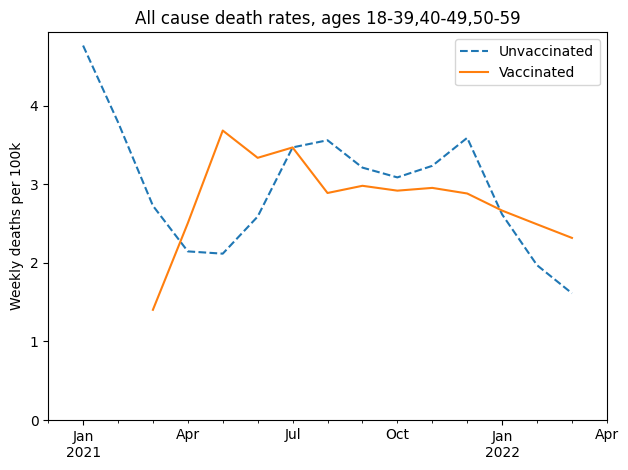

In [128]:
# This figure shows what happens if we combine the youngest three groups,
# as in the original data
groups = ["18-39", "40-49", "50-59"]
make_plot(table, weight, groups)

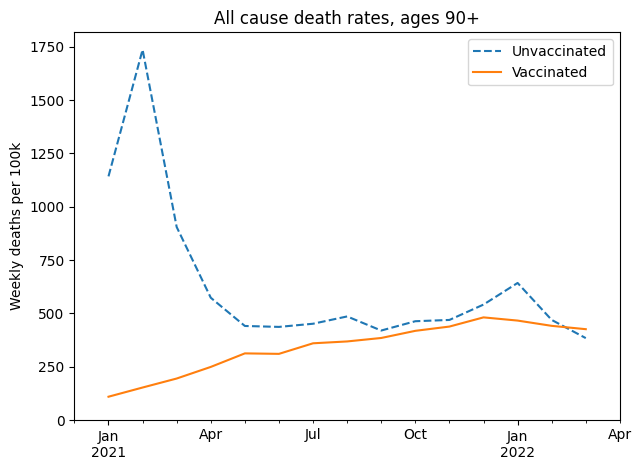

In [129]:
# the following figures look at the older age groups, which I won't present again

groups = ["90+"]
make_plot(table, weight, groups)

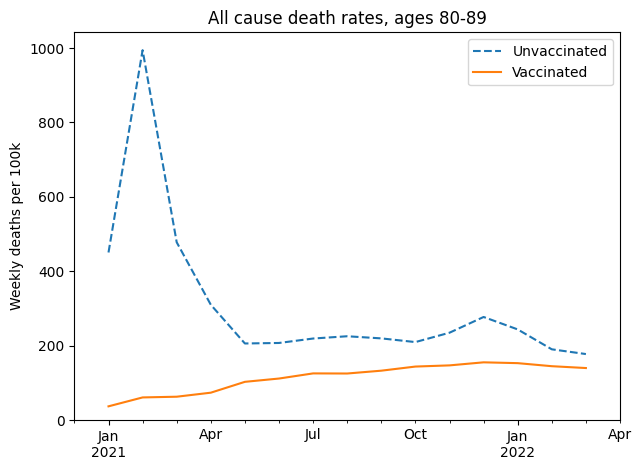

In [130]:
groups = ["80-89"]
make_plot(table, weight, groups)

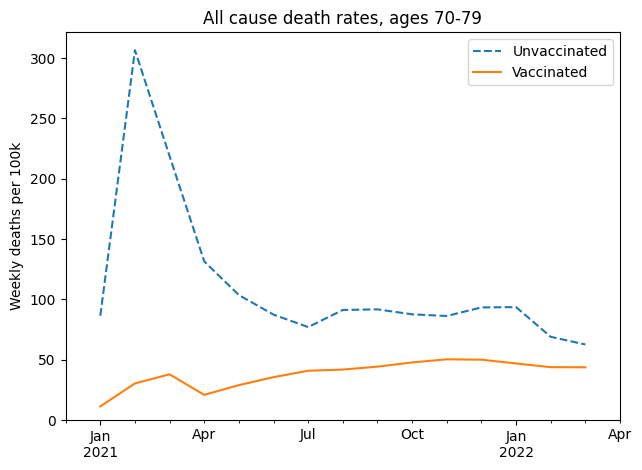

In [131]:
groups = ["70-79"]
make_plot(table, weight, groups)

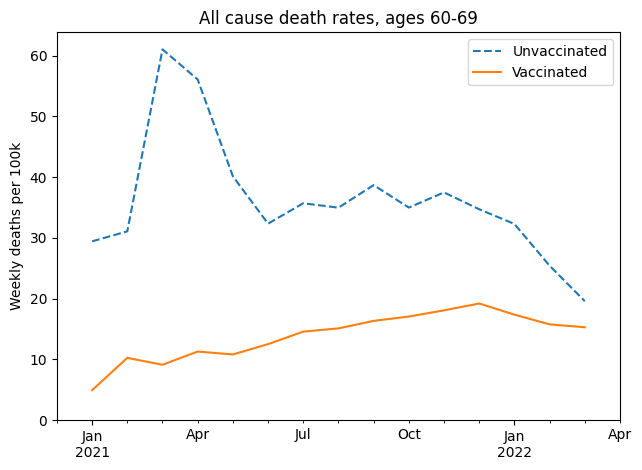

In [132]:
groups = ["60-69"]
make_plot(table, weight, groups)

Let's start with the oldest of these subgroups. 
Among people in their 50s, we see that the all-cause death rate was substantially higher among unvaccinated people over the entire interval from March 2021 to April 2022.

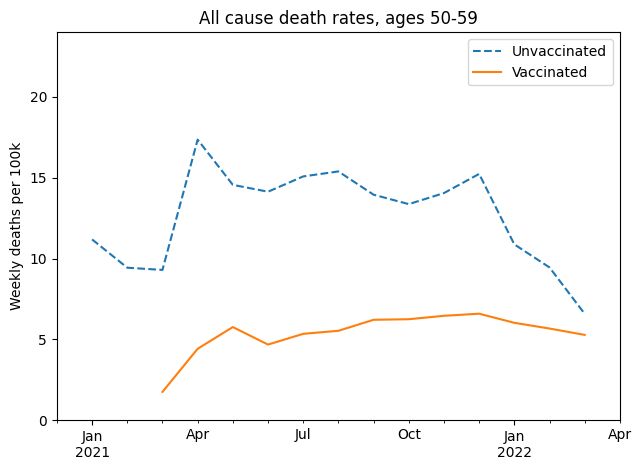

In [133]:
groups = ["50-59"]
make_plot(table, weight, groups)
plt.ylim([0, 24])
plt.legend(loc="upper right")

If we select people in their 40s, we see the same thing: death rates were higher for unvaccinated people over the entire interval.

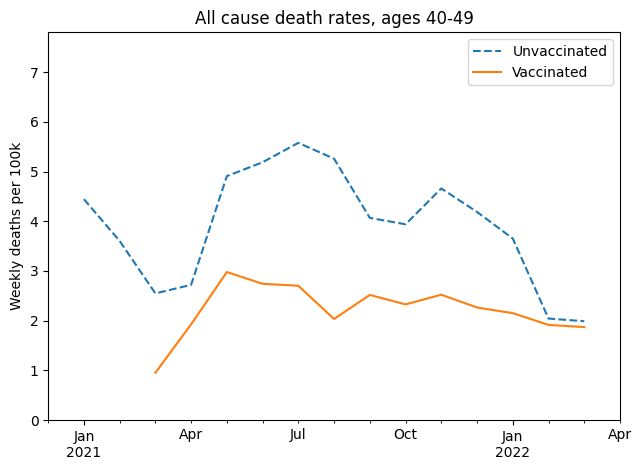

In [134]:
groups = ["40-49"]
make_plot(table, weight, groups)
plt.ylim([0, 7.8])
plt.legend(loc="upper right")

However, it is notable that death rates in both groups have declined since April or May 2021, and have nearly converged.
Possible explanations include improved treatment for coronavirus disease and the decline of more lethal variants of the COVID virus.
In the U.K., December 2021 is when the Delta variant was largely replaced by the Omicron variant, which is less deadly.

Finally, let's see what happened in the youngest group, people aged 18 to 39.

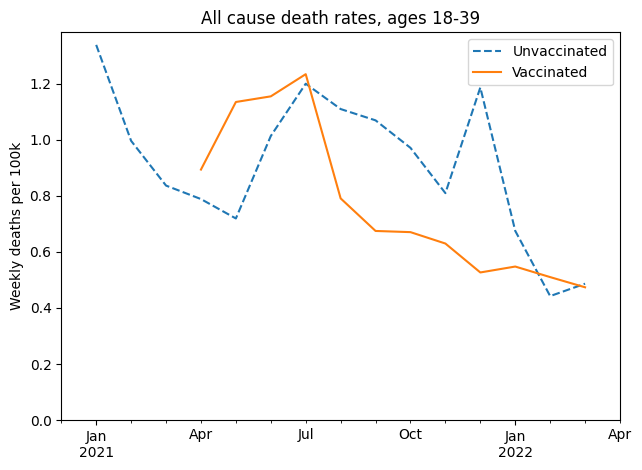

In [135]:
groups = ["18-39"]
make_plot(table, weight, groups)

In this age group, like the others, death rates are generally higher among unvaccinated people.
There are a few months where the pattern is reversed, but we should not take it too seriously because:

* Death rates in this age group are very low, less than 1 per 100,000 per week, vaccinated or not.

* The apparent differences between the groups are even smaller, and might be the result of random variation.

* Finally, this age group is still broad enough that the results are influenced by Simpson's paradox. The vaccinated people in this group were older than the unvaccinated, and the  older people in this group were about 10 times more likely to die, just because of their age.

In summary, the excess mortality among vaccinated people in 2021 is entirely explained by Simpson's paradox.
If we break the dataset into appropriate age groups, we see that death rates were higher among the unvaccinated in all age groups over the entire time from the rollout of the vaccine to the present.
And we can conclude that the vaccine saved many lives.

In [136]:
may = (df["Year"] == 2021) & (df["Month"] == "May")
may.sum()

147

In [137]:
fully = df["Vaccination status"] == "Second dose, at least 21 days ago"
fully.sum()

315

In [138]:
age = df["Age group"] == "18-39"
age.sum()

315

In [139]:
df[may & fully & age]

,Cause of Death,Year,Month,Age group,Vaccination status,Count of deaths,Person-years,"Age-standardised mortality rate / 100,000 person-years",Noted as Unreliable,Lower confidence limit,Upper confidence limit,date,rate
200,All causes,2021,May,18-39,"Second dose, at least 21 days ago",52.0,79347,66.5,NaN,48.9,88.3,2021-05-01,1.278846
935,Deaths involving COVID-19,2021,May,18-39,"Second dose, at least 21 days ago",NaN,79347,x,NaN,x,x,2021-05-01,NaN
1670,Non-COVID-19 deaths,2021,May,18-39,"Second dose, at least 21 days ago",52.0,79347,66.5,NaN,48.9,88.3,2021-05-01,1.278846


In [140]:
sheet

,rate,pct_vax,pct_pop,pct_vax_age,pct_novax_age,death_vax,death_novax
10-14,8.8,0.0,0.092332,0.000000,0.239297,0.000000,2.105810
15-19,23.1,26.7,0.086072,0.037419,0.163513,0.864387,3.777140
20-24,39.1,59.6,0.097027,0.094159,0.101592,3.681603,3.972229
25-29,48.4,59.7,0.106416,0.103444,0.111147,5.006692,5.379523
30-34,66.9,63.3,0.104851,0.108069,0.099730,7.229811,6.671929
35-39,97.3,63.3,0.103286,0.106456,0.098241,10.358164,9.558886
40-44,143.3,74.6,0.093897,0.114054,0.061812,16.344008,8.857590
45-49,219.6,80.5,0.103286,0.135382,0.052199,29.729969,11.462921
50-54,321.5,85.6,0.109546,0.152684,0.040883,49.087972,13.143951
55-59,478.2,88.2,0.103286,0.148332,0.031587,70.932358,15.104973


In [141]:
mortality = sheet["rate"] / 52
mortality

10-14    0.169231
15-19    0.444231
20-24    0.751923
25-29    0.930769
30-34    1.286538
35-39    1.871154
40-44    2.755769
45-49    4.223077
50-54    6.182692
55-59    9.196154
Name: rate, dtype: float64

In [142]:
mortality["55-59"], mortality["20-24"]

(9.196153846153846, 0.7519230769230769)

In [143]:
mortality["55-59"] / mortality["20-24"]

12.230179028132993

In [144]:
sheet.loc["55-59", "pct_vax"], sheet.loc["20-24", "pct_vax"]

(88.2, 59.6)

In [145]:
sheet.loc["55-59", "pct_vax"] / sheet.loc["20-24", "pct_vax"]

1.4798657718120805

## Lives saved

In [146]:
filename = "referencetable20220516accessiblecorrected.xlsx"
download(DATA_PATH + filename)

In [147]:
df = pd.read_excel(
    filename,
    sheet_name="Table 2",
    skiprows=3,
)
df.tail()

,Cause of Death,Year,Month,Age group,Vaccination status,Count of deaths,Person-years,"Age-standardised mortality rate / 100,000 person-years",Noted as Unreliable,Lower confidence limit,Upper confidence limit
2200,Non-COVID-19 deaths,2022,March,90+,"First dose, at least 21 days ago",57,191,29817.6,NaN,22582.1,38633
2201,Non-COVID-19 deaths,2022,March,90+,"Second dose, less than 21 days ago",<3,7,x,NaN,x,x
2202,Non-COVID-19 deaths,2022,March,90+,"Second dose, at least 21 days ago",515,1415,36402.2,NaN,33325.7,39686.4
2203,Non-COVID-19 deaths,2022,March,90+,"Third dose or booster, less than 21 days ago",20,67,29992.6,NaN,18312.4,46323.7
2204,Non-COVID-19 deaths,2022,March,90+,"Third dose or booster, at least 21 days ago",7024,36170,19419.5,NaN,18967.9,19879


In [148]:
df["date"] = pd.to_datetime(df["Year"].astype(str) + " " + df["Month"])

In [149]:
all_cause = df["Cause of Death"] == "All causes"
all_cause.sum()

735

In [150]:
rate_col = "Age-standardised mortality rate / 100,000 person-years"
df[rate_col].replace("x", np.nan, inplace=True)
df[rate_col].describe()

count     1447.000000
mean      6413.953766
std      12747.774742
min          0.900000
25%        122.400000
50%        835.700000
75%       6364.750000
max      97725.700000
Name: Age-standardised mortality rate / 100,000 person-years, dtype: float64

In [151]:
def estimate_saved_lives(period):
    index = period["Vaccination status"]
    deaths = pd.Series(period["Count of deaths"].values, index=index)
    pop = pd.Series(period["Person-years"].values, index=index)
    rate = pd.Series(period[rate_col].values, index=index)

    # choose the minimum rate among the fully vaccinated / boosted
    possible_rate = rate.iloc[4:].min() / 1e5
    actual_deaths = deaths["Unvaccinated"]
    possible_deaths = possible_rate * pop["Unvaccinated"]
    return actual_deaths - possible_deaths

In [152]:
res = []
for name, period in df[all_cause].groupby(["Age group", "date"]):
    saved = estimate_saved_lives(period)
    res.append((name[0], name[1], saved))

saved_df = pd.DataFrame(res, columns=["Age group", "date", "saved"])
saved_df

,Age group,date,saved
0,18-39,2021-01-01,NaN
1,18-39,2021-02-01,NaN
2,18-39,2021-03-01,NaN
3,18-39,2021-04-01,31.750745
4,18-39,2021-05-01,-207.527970
...,...,...,...
100,90+,2021-11-01,106.893788
101,90+,2021-12-01,90.884232
102,90+,2022-01-01,135.587888
103,90+,2022-02-01,26.579092


In [153]:
series = saved_df.groupby("date")["saved"].sum()
series

date
2021-01-01    25602.785167
2021-02-01    14539.347887
2021-03-01     5751.205365
2021-04-01     2371.099972
2021-05-01     1081.724156
2021-06-01      904.974268
2021-07-01      922.228068
2021-08-01     1075.862092
2021-09-01     1603.805799
2021-10-01     1530.583100
2021-11-01     1353.284205
2021-12-01     1445.124507
2022-01-01     1108.678014
2022-02-01      469.170039
2022-03-01      286.239461
Name: saved, dtype: float64

In [154]:
index = period["Vaccination status"]
deaths = pd.Series(period["Count of deaths"].values, index=index)
deaths

pop = pd.Series(period["Person-years"].values, index=index)
pop

rate = pd.Series(period[rate_col].values, index=index)
rate

boosted = "Third dose or booster, at least 21 days ago"
possible_rate = rate.iloc[4:].min() / 1e5
possible_rate

pop[boosted] * possible_rate

deaths[boosted]

actual_deaths = deaths["Unvaccinated"]

possible_deaths = possible_rate * pop["Unvaccinated"]
actual_deaths, possible_deaths

(228, 244.28924099999998)

## Sources and related reading

* The General Social Survey (GSS) is a project of the University of Chicago's independent research organization NORC, with primary financing from the National Science Foundation. Data is available from the GSS website \cite{gss2022}.

* Floyd Norris wrote about changes in real wages in *The New York Times* \cite{norris2013}. The following week, he wrote a blog article to respond to readers who thought he had made a mistake \cite{norris2013blog}.

* The IPUMS CPS data is from the U.S. Census Bureau: Sarah Flood, Miriam King, Renae Rodgers, Steven Ruggles, J. Robert Warren, Daniel Backman, Annie Chen, Grace Cooper, Stephanie Richards, Megan Schouweiler, and Michael Westberry. Integrated Public Use Microdata Series, Current Population Survey: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2023. https://doi.org/10.18128/D030.V11.0

* The penguin dataset was reported in "Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins" \cite{gorman2014ecological}. Allison Horst pointed out the penguin paradox in the online documentation of the dataset \cite{horst2022}.

* The nested Simpson's paradox among dog breeds is described in "Do large dogs die young?" 
\cite{galis2007large}.

* The paper that evaluates treatments for kidney stones was published in 1986 in the *British Medical Journal* \cite{charig1986comparison}.

* Derek Thompson wrote about the misleading journalist in *The Atlantic* \cite{thompson2021}. Jeffrey Morris debunks the misleading newsletter in a series of blog articles \cite{morris2021}.

* Information about the prevalence of different COVID variants is from the U.K. Health Security Agency \cite{ukhsa2022}.

* The COVID data I used is from the U.K. Office for National Statistics \cite{ukons2022}.

## Israeli Data

This is an analysis I started with another dataset that demonstrates a Simpson's paradox if you don't separate age groups.

Downloaded from https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated

Originally from an [Israeli government COVID dashboard](https://datadashboard.health.gov.il/COVID-19/general) with headings translated by Jeffrey S. Morris, director of the Biostatistics Division at the University of Pennsylvania.

https://www.dbei.med.upenn.edu/bio/jeffrey-s-morris-phd

In [155]:
filename = "Israeli_data_August_15_2021.xlsx"
download(DATA_PATH + filename)

In [156]:
df = pd.read_excel(filename, skiprows=2).loc[0:9]
df.index = df["age group"]
del df["age group"]
df

,population unvax,population vax,population partial,proportion unvax,proportion vax,proportion partial,not vax,vax,partial vax,not vax per 100k,...,proportion of unvax,severe unvax,severe vax,severe partial vax,severe unvax per 100k,risk severe 20-29,severe vax 100k,severe parital vax per 1`00k,Efficacy severe,Efficacy severe partial
age group,,,,,,,,,,,,,,,,,,,,,
12-15,383648.581384,184549.356223,49986.229689,0.620606,0.298535,0.080860,3083.0,172.0,363.0,803.6,...,0.294455,1,0,0.0,0.3,0.048387,0.0,0.0,1.000000,1.000000
16-19,127745.045528,429109.159348,26662.484316,0.218923,0.735385,0.045693,954.0,1710.0,85.0,746.8,...,0.098046,2,0,0.0,1.6,0.258065,0.0,0.0,1.000000,1.000000
20-29,265871.262336,991408.292865,43064.876957,0.204462,0.762420,0.033118,1805.0,5308.0,154.0,678.9,...,0.204059,4,0,0.0,1.5,0.241935,0.0,0.0,1.000000,1.000000
30-39,194213.423919,968837.047354,33911.882510,0.162255,0.809413,0.028332,1658.0,5565.0,127.0,853.7,...,0.149061,12,2,0.0,6.2,1.000000,0.2,0.0,0.967742,1.000000
40-49,145355.468255,927214.116050,26025.236593,0.132310,0.844000,0.023690,1147.0,5465.0,66.0,789.1,...,0.111562,24,9,1.0,16.5,2.661290,1.0,3.8,0.939394,0.769697
50-59,84545.028143,747949.291573,17472.118959,0.099469,0.879975,0.020556,721.0,4012.0,47.0,852.8,...,0.064889,34,22,0.0,40.2,6.483871,2.9,0.0,0.927861,1.000000
60-69,65204.929779,665716.790881,10668.163953,0.087926,0.897689,0.014386,455.0,3037.0,19.0,697.8,...,0.050046,50,58,3.0,76.7,12.370968,8.7,28.1,0.886571,0.633638
70-79,20512.376666,464336.324988,5885.500268,0.041799,0.946207,0.011993,237.0,1966.0,22.0,1155.4,...,0.015743,39,92,2.0,190.1,30.661290,19.8,34.0,0.895844,0.821147
80-89,12683.457148,208911.307272,3924.366750,0.056241,0.926357,0.017401,140.0,994.0,11.0,1103.8,...,0.009735,32,100,2.0,252.3,40.693548,47.9,51.0,0.810147,0.797860


In [157]:
df.columns

Index(['population unvax', 'population vax', 'population partial',
       'proportion unvax', 'proportion vax', 'proportion partial', 'not vax',
       'vax', 'partial vax', 'not vax per 100k', 'vax per 100k',
       'partial vax 100k', 'Efficacy', 'Efficacy partial',
       'proportion of unvax', 'severe unvax', 'severe vax',
       'severe partial vax', 'severe unvax per 100k', 'risk severe 20-29',
       'severe vax 100k', 'severe parital vax per 1`00k', 'Efficacy severe',
       'Efficacy severe partial'],
      dtype='object')

In [158]:
overall = df.sum()
overall

population unvax                1302911.633129
population vax                  5634633.628302
population partial               219364.972898
proportion unvax                       1.68481
proportion vax                        8.004906
proportion partial                    0.310284
not vax                                10261.0
vax                                    28493.0
partial vax                              901.0
not vax per 100k                        9629.5
vax per 100k                            4649.2
partial vax 100k                        3528.7
Efficacy                              4.770884
Efficacy partial                      6.030771
proportion of unvax                        1.0
severe unvax                               214
severe vax                                 301
severe partial vax                        10.0
severe unvax per 100k                   1096.3
risk severe 20-29                   176.822581
severe vax 100k                          119.1
severe parita

In [159]:
overall_risk_vax = overall["severe vax"] / overall["population vax"] * 1e5
overall_risk_vax

5.341962226046172

In [160]:
overall_risk_unvax = overall["severe unvax"] / overall["population unvax"] * 1e5
overall_risk_unvax

16.4247516530378

In [161]:
age_group = df.index
risk_vax = pd.Series(df["severe vax 100k"].values, index=age_group)
risk_unvax = pd.Series(df["severe unvax per 100k"].values, index=age_group)
risk_vax

age group
12-15     0.0
16-19     0.0
20-29     0.0
30-39     0.2
40-49     1.0
50-59     2.9
60-69     8.7
70-79    19.8
80-89    47.9
90+      38.6
dtype: float64

In [162]:
table = pd.DataFrame(columns=["age_group"])

Probably Overthinking It

Copyright 2022 Allen Downey 

The code in this notebook and `utils.py` is under the [MIT license](https://mit-license.org/).